In [23]:
import torch
import torchvision
from torchvision import datasets, transforms

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [ ]:
!wget -x --load-cookies cookies.txt -P data -nH --cut-dirs=5 https://storage.googleapis.com/kaggle-data-sets/40205/63131/bundle/archive.zip

Remove error folder in dataset

In [58]:
!rm -r dataset/dataset

# Exploration

In [59]:
from sklearn.datasets import load_files

def load_dataset(path):
    data = load_files(path, load_content=False)
    labels = data.target_names
    df = pd.merge(pd.DataFrame(data.target, columns=['target']), pd.DataFrame(data.target_names, columns=['pokemon']),
                          how='left', left_on='target', right_index=True)
    df = pd.concat([df, pd.DataFrame(data.filenames, columns=['filename']),
                    #pd.DataFrame(data.data, columns=['data'])
                   ], axis=1, sort=False)
    return df

df = load_dataset('dataset')

In [60]:
df

,target,pokemon,filename
0,80,Metapod,dataset/Metapod/a4c223df526c4e81a2f4bef8e89b60...
1,14,Charmander,dataset/Charmander/00000116.jpg
2,43,Golbat,dataset/Golbat/efca9ac45bae4bb9954cacd4e0ef815...
3,1,Aerodactyl,dataset/Aerodactyl/ef7f7eeaa897478bbe1df7b0bb0...
4,14,Charmander,dataset/Charmander/00000107.png
...,...,...,...
10688,127,Squirtle,dataset/Squirtle/00000098.png
10689,70,Machamp,dataset/Machamp/bdbf94a668414fbe9bf8e93937900a...
10690,45,Golduck,dataset/Golduck/c2c1b86fe4c94fea8f8743523a77c2...
10691,135,Venomoth,dataset/Venomoth/1b22b6f2203e4e2d8c0c8e992a33d...


In [194]:
len(df['pokemon'].unique())

149

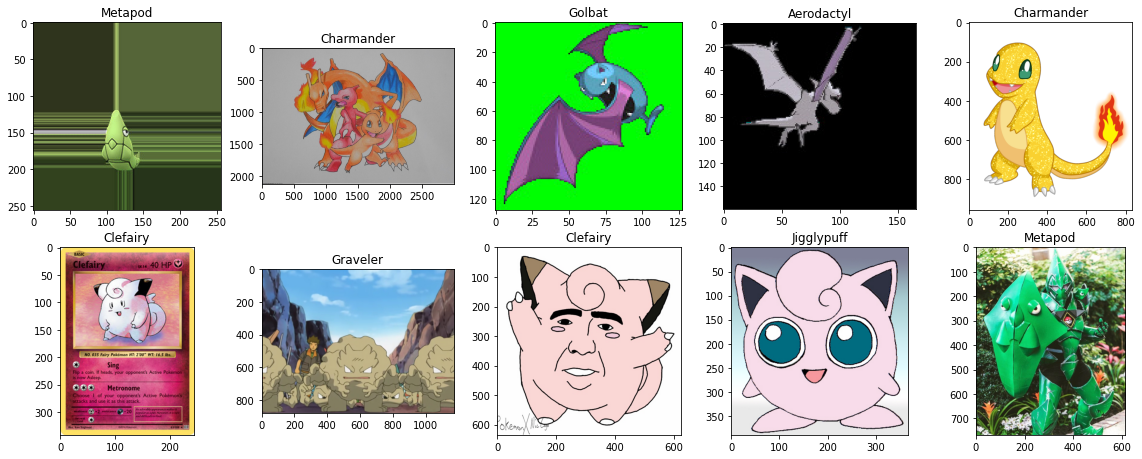

In [62]:
def imshow(img):
    plt.imshow(img)
    plt.show()

def show_first_img(df):
    
    fig = plt.figure(figsize=[20, 20])
    
    for idx, filename in enumerate(df['filename'].values[:10]):
        img = mpimg.imread(filename)
        ax = fig.add_subplot(5, 5, idx +1)
        imgplot = plt.imshow(img)
        ax.set_title(df['pokemon'].values[idx])
        
    plt.show()


show_first_img(df)

#print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [63]:
counts = df.groupby('pokemon').size().reset_index(name="Counts")
counts

,pokemon,Counts
0,Abra,42
1,Aerodactyl,97
2,Alakazam,49
3,Arbok,63
4,Arcanine,61
...,...,...
144,Weepinbell,51
145,Weezing,63
146,Wigglytuff,67
147,Zapdos,60


<BarContainer object of 149 artists>

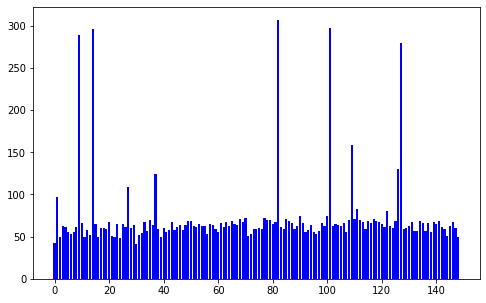

In [64]:
plt.figure(figsize=(8,5))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')

In [65]:
counts.sort_values(by=['Counts'], inplace=True)
counts.tail(10)

,pokemon,Counts
1,Aerodactyl,97
27,Dratini,109
37,Fearow,124
126,Spearow,130
109,Psyduck,159
127,Squirtle,280
9,Bulbasaur,289
14,Charmander,296
101,Pikachu,298
82,Mewtwo,307


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df["filename"], df["target"], test_size=0.33, random_state=42)

In [68]:
X_train

4100     dataset/Seaking/ef75d34c392a471f80581b5cfab645...
3826     dataset/Mankey/af735a984a6248f3bbf5cd9504b7ac8...
9026     dataset/Marowak/b80081662f2f4052adb69311d798fb...
4341     dataset/Rattata/63bb7d00ffd14e4686ecd4f1de0585...
10612    dataset/Vaporeon/78285779584a44f4a09fd935e09f4...
                               ...                        
5734     dataset/Kakuna/cadc360483174450acc7334fd475b3a...
5191     dataset/Articuno/e3d26813c5634db6b25f215348642...
5390     dataset/Marowak/13a500df3bb24969b6ad11b09ce9b1...
860      dataset/Graveler/f1dbe67c5ffb4288ac058860a306b...
7270     dataset/Flareon/23f57c80ee784b63b23e4cea6cd6f4...
Name: filename, Length: 7164, dtype: object

# Prototype

In [281]:
transform_train = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(250),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                               transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)])
                                      
transform_test = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(250),
                                transforms.ToTensor(),
                               transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)])

In [282]:
valid_size = 0.2

In [283]:
from torch.utils.data.sampler import SubsetRandomSampler

train_data = datasets.ImageFolder('dataset', transform=transform)
test_data = datasets.ImageFolder('dataset', transform=transform)    
num_train = len(train_data)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.shuffle(indices)
train_idx, test_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
trainloader = torch.utils.data.DataLoader(train_data,
               sampler=train_sampler, batch_size=4)
testloader = torch.utils.data.DataLoader(test_data,
               sampler=test_sampler, batch_size=4)

In [284]:
torch.save(trainloader, 'train_dataloader.pth')
torch.save(testloader, 'test_dataloader.pth')

In [285]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

for i in range(3):
    batch_x, batch_y = next(iter(trainloader))
    print(np.shape(batch_x), batch_y)

torch.Size([4, 3, 250, 250]) tensor([12, 77, 95, 62])
torch.Size([4, 3, 250, 250]) tensor([45, 83, 91, 75])
torch.Size([4, 3, 250, 250]) tensor([99, 70, 58, 47])


In [286]:
pokemons = np.sort(df['pokemon'].unique())

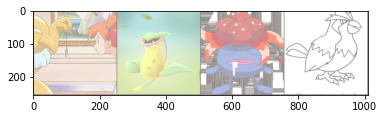

Hypno Victreebel Gloom Pidgey


In [287]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % pokemons[j] for j in labels))

# Preprocess data

In [291]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 59 * 59, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 149)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), 16 * 59 * 59)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [292]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [293]:
for epoch in range(80):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


/home/bazema/workspace/venv_pytorch/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[1,  2000] loss: 4.801
[2,  2000] loss: 4.502
[3,  2000] loss: 4.256
[4,  2000] loss: 4.020
[5,  2000] loss: 3.806
[6,  2000] loss: 3.531
[7,  2000] loss: 3.119
[8,  2000] loss: 2.684
[9,  2000] loss: 2.197


KeyboardInterrupt: 

In [ ]:
PATH = './pokemon_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % pokemons[j] for j in labels))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

In [ ]:
print('Predicted: ', ' '.join('%5s' % pokemons[j] for j in predicted))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(149))
class_total = list(0. for i in range(149))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [ ]:
for i in range(149):
    if class_total[i] == 0.0:
        print(pokemons[i])
    else:
        print('Accuracy of %5s : %2d %%' % (
            pokemons[i], 100 * class_correct[i] / class_total[i]))